<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изменение-веса-классов" data-toc-modified-id="Изменение-веса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение веса классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Изучение данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, roc_curve, roc_auc_score
pd.options.mode.chained_assignment = None

Считываем файл исходных данных в переменную `data`.

In [2]:
data = pd.read_csv('.\\datasets\\Churn.csv')

Рассмотрим загруженные данные:

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Описание данных в соответствии с заданием (для сведения):**

Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента

In [5]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Промежточный вывод:**

Предварительная оценка признаков на предмет их использования в рамках создания модели

- `RowNumber` — индекс строки в данных, не имеет значения для дальнейшего анализа и моделирования, поэтому не будет использован;
- `CustomerId` и `Surname` — уникальный идентификатор клиента и его фамилия, также не имеют значения при моделировании;
- `CreditScore` — кредитный рейтинг, в банковском деле является важным признаком, применим для создания модели;
- `Geography` — страна проживания, применим для создания модели, необходимо закодировать;
- `Gender` — пол, применим для создания модели, необходимо закодировать;
- `Age` — возраст, признак применимый для создания модели;
- `Tenure` — сколько лет человек является клиентом банка, признак применимый для создания модели, есть **909** пропусков, для снижения влияния на моделирование, выбросим данные строки;
- `Balance` — баланс на счёте, признак применимый для создания модели, необходимо отмасштабировать;
- `NumOfProducts` — количество продуктов банка, используемых клиентом, признак применимый для создания модели;
- `HasCrCard` — наличие кредитной карты, признак применимый для создания модели;
- `IsActiveMember` — активность клиента, важный признак, подлежит использовании в модели;
- `EstimatedSalary` — предполагаемая зарплата, признак применимый для создания модели, необходимо отмасштабировать;

### Обработка данных

Первым делом удалим столбцы и строки, не пригодные для моделирования

In [6]:
dropped_features = ['RowNumber', 'CustomerId', 'Surname']
data_shrink = data.fillna(data['Tenure'].mean()).drop(dropped_features, axis = 1)

In [7]:
data_shrink.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Закодируем строковые значения столбцов `Geography` и `Gender`:

для кодирования столбца `Gender` воспользуемся методом OHE:

In [8]:
data_ohe = pd.get_dummies(data_shrink, columns = ['Gender'], drop_first = True)

... и методом Ordinal Encoding для столбца `Geography`, для чего импортируем соответствующую библиотеку:

In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(data_ohe)
data_ordinal = pd.DataFrame(encoder.transform(data_ohe), columns=data_ohe.columns)
data_ordinal.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,228.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0,1.0,0.0
1,217.0,2.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0,0.0,0.0
2,111.0,0.0,24.0,9.0,5793.0,2.0,1.0,0.0,5707.0,1.0,0.0
3,308.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0,0.0,0.0
4,459.0,2.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0,0.0,0.0


Созадим переменные **X** ...

In [10]:
X = data_ordinal.copy()

... и **y**, с целевым признаком

In [11]:
y = X.pop('Exited')

Разделим данные на тренировочную, валидационную и тестовые выборки в пропорциях 5:2:1.

In [12]:
X2, X_test, y2, y_test = train_test_split(X, y,
                                          test_size=0.125,
                                          random_state=13)

X_train, X_valid, y_train, y_valid = train_test_split(X2, y2,
                                                      test_size=0.285,
                                                      random_state=13)

print('Тренировочная выборка:', X_train.shape[0])
print('Валидационная выборка:', X_valid.shape[0])
print('Тестовая выборка:', X_test.shape[0])

Тренировочная выборка: 6256
Валидационная выборка: 2494
Тестовая выборка: 1250


Как было определено ранее, необходимо отмасштабировать признаки, такие как `Age`, `Tenure`, `Balance`, `EstimatedSalary`, для чего воспользуемся библиотекой **`StandardScaler`**

In [13]:
col_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler().fit(X_train[col_names].values)

X2[col_names] = scaler.transform(X2[col_names].values)
X_train[col_names] = scaler.transform(X_train[col_names].values)
X_valid[col_names] = scaler.transform(X_valid[col_names].values)
X_test[col_names] = scaler.transform(X_test[col_names].values)

### Вывод

Данные подготовлены, и готовы к дальнейшему моделированию.

## Исследование задачи

Узнаем, какие классы встречаются чаще, положительные или отрицательные: 

In [14]:
print('Отрицательный класс встречается в',
      y_train.where(y_train == 0).count() / y_train.where(y_train == 1).count(),
      'раз чаще')

Отрицательный класс встречается в 3.965079365079365 раз чаще


т.е. почти в 4 раза значение "0" является более частым, чем "1", что является дисбалансом

Проверим метрику F1 на моделях `LogisticRegression()` и `RandomForestClassifier()`

In [15]:
model = LogisticRegression(random_state=13, solver='liblinear')
model.fit(X_train, y_train)

print('LogisticRegression')
print("F1:", f1_score(y_valid, model.predict(X_valid)))
print('ROC_AUC:', roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))

LogisticRegression
F1: 0.26403641881638845
ROC_AUC: 0.7476220436746753


Также построим ROC кривую при данных параметрах

(0.0, 1.0)

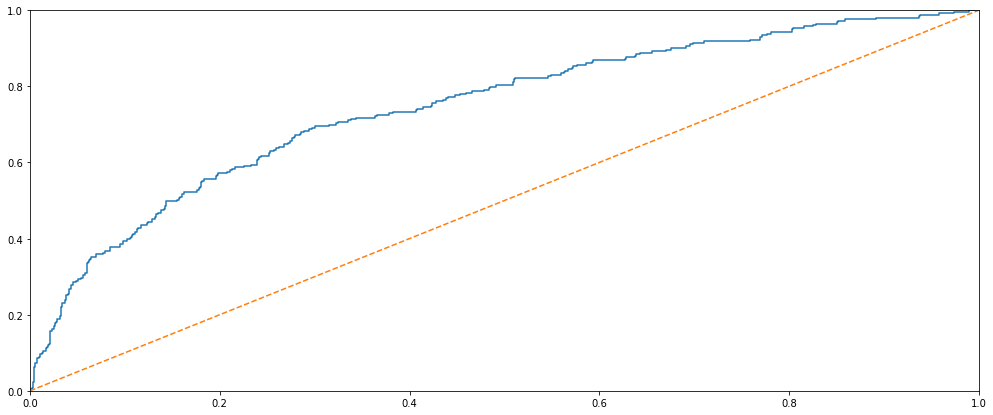

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1]) 

plt.figure(figsize=[17,7])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

Для подбора оптимальных гиперпараметров `RandomForestClassifier()` воспользуемся методом `GridSearchCV`, для чего первым делом укажем требуемые параметры:

In [17]:
clf = RandomForestClassifier()
parameters = {'n_estimators': range (10, 101, 5),
              'max_depth': range (1,15, 2),
              'random_state': [13]}

И произведём подбор:

*Для подбора в данном случае используются все данные, так как подбираются параметры, а не обучается модель и "зазубрить ответы" для тестовой выборки она не способна*

In [18]:
grid = GridSearchCV(clf,
                    parameters,
                    cv=5)  #почему-то в scoring='f1' в данном случае выдаёт ошибки 
                           
grid.fit(X, y)
grid.best_params_

{'max_depth': 13, 'n_estimators': 45, 'random_state': 13}

Построим тепловую карту зависимости оценки от гиперпараметров:

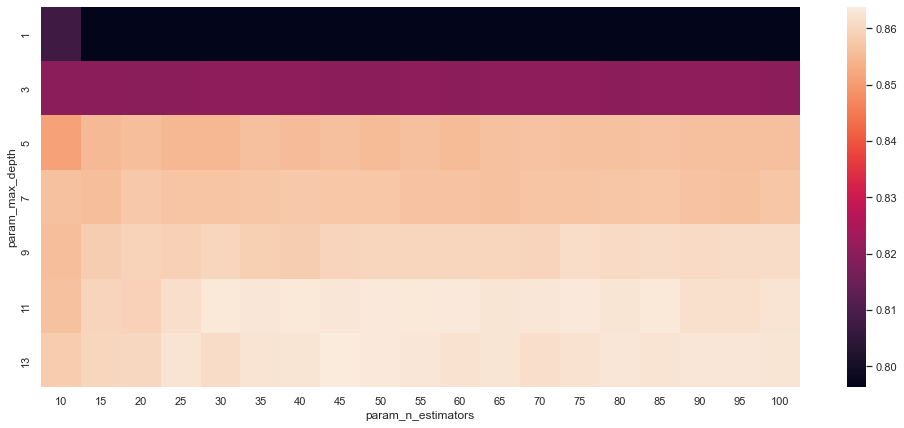

In [19]:
sns.set(rc={'figure.figsize':(17,7)})


pvt = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

ax = sns.heatmap(pvt)

При анализе данной тепловой карты является очевидным, что самый важный гиперпараметр - это максимальная глубина, граничным значением в данном случае является max_depth=7

Проверим модель с полученными гиперпараметрами:

In [20]:
model = RandomForestClassifier(n_estimators = 55, max_depth = 13, random_state=13)
model.fit(X_train, y_train)

print('RandomForestClassifier')
print("F1:", f1_score(y_valid, model.predict(X_valid)))
print('ROC_AUC:', roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))

RandomForestClassifier
F1: 0.5420326223337515
ROC_AUC: 0.8390375627217732


Построим ROC-кривую также и для данного случая

(0.0, 1.0)

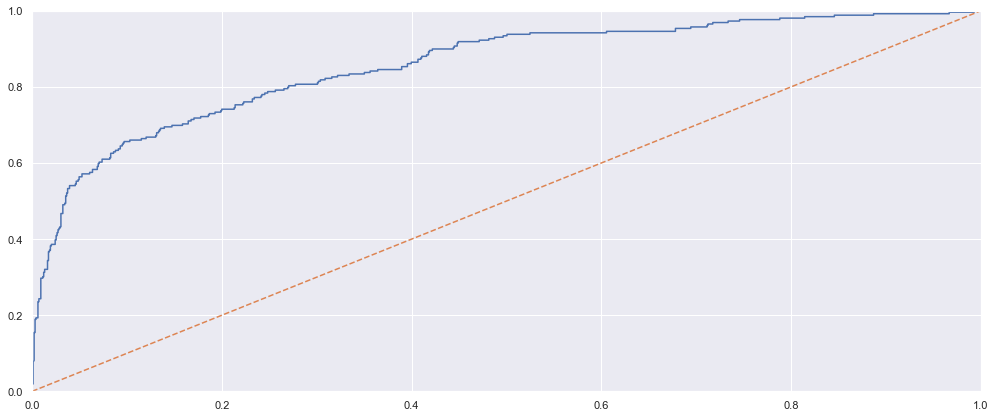

In [21]:
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:, 1]) 

plt.figure(figsize=[17,7])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

### Вывод

Дисбаланс классов в представленных данных заметен, и отличие между отрицательныами и положительынми значениями составляет 4 раза. 
Без дополнительных мероприятий по борьбе с дисбалансом классов получаем следующие метрики:

- **LogisticRegression**:
  - F1-мера составляет 0.26, что меньше требуемой 0.59;
  - ROC график стремится к случайной модели;
  - AUC_ROC составляет 0.75;
    
- **RandomForestClassifier**:
  - F1-мера составляет 0.54, что меньше требуемой 0.59;
  - ROC график проходит более высоко, и показывает более высокое качество; 
  - AUC_ROC составляет 0.84;
  
Для того, чтобы определить зависимость этих метрик от дисбаланса, произведём мероприятия по его уменьшению, и сравним полученные результаты.

## Борьба с дисбалансом

### Изменение веса классов

Первым этапом добавим гиперпараметр ***class_weight='balanced'*** к выбранным моделям

In [22]:
model = LogisticRegression(random_state=13,
                           solver='liblinear',
                           class_weight='balanced')
model.fit(X_train, y_train)

print('LogisticRegression (balanced)')
print("F1:", f1_score(y_valid, model.predict(X_valid)))
print('ROC_AUC:', roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))

LogisticRegression (balanced)
F1: 0.4756013745704467
ROC_AUC: 0.7554573804573805


In [23]:
model = RandomForestClassifier(n_estimators = 55,
                               max_depth = 13,
                               random_state=13,
                               class_weight='balanced')
model.fit(X_train, y_train)

print('RandomForestClassifier (balanced)')
print("F1:", f1_score(y_valid, model.predict(X_valid)))
print('ROC_AUC:', roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))

RandomForestClassifier (balanced)
F1: 0.5802752293577982
ROC_AUC: 0.8488502962187172


**Промежточный вывод:**

Добавление данного гиперпараметра улучшает значение метрики F1:
- в случае модели **LogisticRegression** - в два раза, до значения 0.47, что меньше требуемого;
- в случае модели **RandomForestClassifier** - на 5%, до значения 0.58, что меньше требуемого;

### Увеличение выборки

Для борьбы с дисбалансом воспользуемся upsampling (увеличением выборки) с оформлением его в функцию `upsample`

In [24]:
def upsample(X, y, times):
    X_zero = X[y == 0]
    X_one = X[y == 1]
    y_zero = y[y == 0]
    y_one = y[y == 1]

    X_up = pd.concat([X_zero] + [X_one] * times)
    y_up = pd.concat([y_zero] + [y_one] * times)
    
    X_up, y_up = shuffle(X_up, y_up, random_state=13)
    
    return X_up, y_up

И присвоим результат работы этой фукнции

In [25]:
X_upsampled, y_upsampled = upsample(X_train, y_train, 4)

... с последующей проверкой:

In [26]:
print('Отрицательный класс встречается в',
      y_upsampled.where(y_upsampled == 0).count() / y_upsampled.where(y_upsampled == 1).count(),
      'раз чаще')

Отрицательный класс встречается в 0.9912698412698413 раз чаще


Произведём проверку метрик на увеличенной выборке:

In [27]:
model = LogisticRegression(random_state=13, solver='liblinear')
model.fit(X_upsampled, y_upsampled)

print('LogisticRegression (upsampled)')
print("F1:", f1_score(y_valid, model.predict(X_valid)))
print('ROC_AUC:', roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))

LogisticRegression (upsampled)
F1: 0.4754098360655738
ROC_AUC: 0.755460311381364


In [28]:
model = RandomForestClassifier(n_estimators = 55,
                               max_depth = 13,
                               random_state=13)
model.fit(X_upsampled, y_upsampled)

print('RandomForestClassifier (upsampled)')
print("F1:", f1_score(y_valid, model.predict(X_valid)))
print('ROC_AUC:', roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))

RandomForestClassifier (upsampled)
F1: 0.6029556650246305
ROC_AUC: 0.8474776468197521


### Вывод

В результате борьбы с дисбалансом получаем следующие метрики:

- **LogisticRegression**:
  - F1-мера составляет 0.47, что меньше требуемой 0.59, но больше первоначального значения 0.26;
  - AUC_ROC не изменяется при изменениях баланса, и составляет 0.75;
    
- **RandomForestClassifier**:
  - F1-мера составляет 0.60, что больше как требуемой 0.59, так и прошлого значения 0.54;
  - AUC_ROC не изменяется при изменениях баланса, и составляет 0.84;
  
Следовательно, принятые методы борьбы с дисбалансом принесли свои результаты, и значительно улучшили значения F1-меры. Наилучший результат в борьбе с дисбалансом принесло увеличение выборки.

## Тестирование модели

Произведём финальную проверку модели с наилучшими гиперпараметрами на тестовой выборке, с учётом использования увеличения выборки (**upsample**)

Для тренировки модели воспользуемся всем оставшимся объёмом данных, а именно переменными ***X2*** и ***y2***, содержащими в себе как тренировочную, так и валидационную выборку.

In [29]:
model = RandomForestClassifier(n_estimators = 55,
                               max_depth = 13,
                               random_state=13)

X_final, y_final = upsample(X2, y2, 4)
model.fit(X_final, y_final)

predict = model.predict(X_test)

И получим финальное значение F1 и ROC_AUC

In [30]:
print("Final F1:", f1_score(y_test, predict))
print('Final ROC_AUC:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Final F1: 0.6512524084778419
Final ROC_AUC: 0.8702297511581063


Также построим график ROC и сравним его со случайной моделью:

(0.0, 1.0)

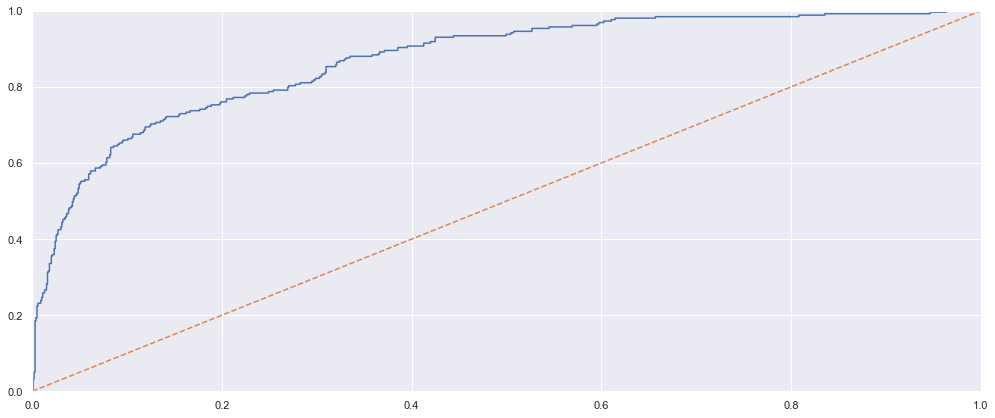

In [31]:
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:, 1]) 

plt.figure(figsize=[17,7])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

Проверим все модели, на тестовых данных

In [32]:
#---------------------LogisticRegression unbalanced---------------------
model_lr_unbalanced = LogisticRegression(random_state=13,
                                         solver='liblinear')
model_lr_unbalanced.fit(X2, y2)
f1_lr_unbalanced = f1_score(y_test,
                            model_lr_unbalanced.predict(X_test))
roc_auc_lr_unbalanced = roc_auc_score(y_test,
                                      model_lr_unbalanced.predict_proba(X_test)[:,1])

#---------------------RandomForestClassifier unbalanced------------------
model_rfc_unbalanced = RandomForestClassifier(n_estimators = 55,
                                              max_depth = 13,
                                              random_state=13)
model_rfc_unbalanced.fit(X2, y2)
f1_rfc_unbalanced = f1_score(y_test,
                             model_rfc_unbalanced.predict(X_test))
roc_auc_rfc_unbalanced = roc_auc_score(y_test,
                                       model_rfc_unbalanced.predict_proba(X_test)[:,1])

#---------------------LogisticRegression balanced---------------------
model_lr_balanced = LogisticRegression(random_state=13,
                                       solver='liblinear',
                                       class_weight='balanced')
model_lr_balanced.fit(X2, y2)
f1_lr_balanced = f1_score(y_test,
                          model_lr_balanced.predict(X_test))
roc_auc_lr_balanced = roc_auc_score(y_test,
                                    model_lr_balanced.predict_proba(X_test)[:,1])

#---------------------RandomForestClassifier unbalanced------------------
model_rfc_balanced = RandomForestClassifier(n_estimators = 55,
                                            max_depth = 13,
                                            random_state=13,
                                            class_weight='balanced')
model_rfc_balanced.fit(X2, y2)
f1_rfc_balanced = f1_score(y_test,
                           model_rfc_balanced.predict(X_test))
roc_auc_rfc_balanced = roc_auc_score(y_test,
                                     model_rfc_balanced.predict_proba(X_test)[:,1])

#---------------------LogisticRegression upsampled data------------------
model_lr_upscaled = LogisticRegression(random_state=13,
                                       solver='liblinear')
model_lr_upscaled.fit(X_final, y_final)
f1_lr_upscaled = f1_score(y_test,
                          model_lr_upscaled.predict(X_test))
roc_auc_lr_upscaled = roc_auc_score(y_test,
                                    model_lr_upscaled.predict_proba(X_test)[:,1])

#-----------------------------------------------------------------------

И соберём данные в результирующую таблицу:

In [33]:
pd.set_option('display.float_format', '{:,.4f}'.format)

type_name = ['unbalanced', 'balanced', 'upsampled']
model_name = ['LogisticRegression', 'RandomForestClassifier']

result_data = {'F1':[f1_lr_unbalanced,
                     f1_lr_balanced,
                     f1_lr_upscaled,
                     f1_rfc_unbalanced,
                     f1_rfc_balanced,
                     f1_score(y_test, predict)],
               'ROC_AUC':[roc_auc_lr_unbalanced,
                          roc_auc_lr_balanced,
                          roc_auc_lr_upscaled,
                          roc_auc_rfc_unbalanced,
                          roc_auc_rfc_balanced,
                          roc_auc_score(y_test, model.predict_proba(X_test)[:,1])]}
    
result = pd.DataFrame(result_data,
                      index = pd.MultiIndex.from_product(
                          [model_name, type_name],
                          names=['model', 'type']))

result

F1  ROC_AUC
model                  type                      
LogisticRegression     unbalanced 0.2832   0.7486
                       balanced   0.4928   0.7516
                       upsampled  0.4972   0.7516
RandomForestClassifier unbalanced 0.5856   0.8620
                       balanced   0.6298   0.8696
                       upsampled  0.6513   0.8702

### Вывод

Полученная модель с гиперпараметрами *n_estimators* = 55, *max_depth* = 13 и использованием увеличения выборки достигает заданного значения метрики **F1** с результатом **0.65** и значения метрики **ROC_AUC** равным 0.87.

Следовательно, данная модель пригодна для определения целевого признака с необходимой точностью. 